# Analysis of the AMLTK Pipeline
We compare 10 runs on the original data vs. 10 runs on feature-engineered data by OpenFE on different datasets.

### Imports

In [37]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Sneak

In [38]:
df = pd.read_parquet("results.parquet")
df.head()

,status,trial_seed,exception,traceback,bucket,created_at,reported_at,"metric:accuracy [0.0, 1.0] (maximize)",summary:split_0:val_accuracy,summary:split_0:train_accuracy,...,profile:cv:train_score:memory:diff_vms,profile:cv:train_score:memory:start_rss,profile:cv:train_score:memory:end_rss,profile:cv:train_score:memory:diff_rss,profile:cv:train_score:memory:unit,profile:cv:train_score:time:start,profile:cv:train_score:time:end,profile:cv:train_score:time:duration,profile:cv:train_score:time:kind,profile:cv:train_score:time:unit
name,,,,,,,,,,,,,,,,,,,,,
trial-F4ne-4,success,42,NA,NA,/Users/schaefer.bastian/Programming/ALU/Master...,2024-05-03 12:15:17.501406,2024-05-03 12:15:21.262356,0.651627,0.617647,0.661017,...,0,250642432,250642432,0,bytes,1714731321.203525,1714731321.223501,0.019976,wall,seconds
trial-PhYq-2,success,42,NA,NA,/Users/schaefer.bastian/Programming/ALU/Master...,2024-05-03 12:15:17.501250,2024-05-03 12:15:21.361648,0.640486,0.617647,0.65678,...,0,250560512,250560512,0,bytes,1714731321.287842,1714731321.316169,0.028327,wall,seconds
trial-5JTG-3,success,42,NA,NA,/Users/schaefer.bastian/Programming/ALU/Master...,2024-05-03 12:15:17.501329,2024-05-03 12:15:21.497812,0.622103,0.617647,0.699153,...,0,249069568,249069568,0,bytes,1714731321.4421,1714731321.460861,0.018761,wall,seconds
trial-FOyc-1,success,42,NA,NA,/Users/schaefer.bastian/Programming/ALU/Master...,2024-05-03 12:15:17.501144,2024-05-03 12:15:22.290717,0.68115,0.647059,0.868644,...,0,251822080,251822080,0,bytes,1714731322.230508,1714731322.251136,0.020628,wall,seconds
trial-iyEK-6,success,42,NA,NA,/Users/schaefer.bastian/Programming/ALU/Master...,2024-05-03 12:15:21.363040,2024-05-03 12:15:23.537547,0.625891,0.617647,0.661017,...,0,250806272,250822656,16384,bytes,1714731323.479844,1714731323.499314,0.01947,wall,seconds


### Status

In [39]:
executed = df["created_at"][0]
now = datetime.now()
duration = now - executed
duration_in_s = duration.total_seconds()
minutes = divmod(duration_in_s, 60)[0]
print("The parquet was executed " + str(minutes) + " minutes ago.")
print(df["status"].to_string(index=1))

The parquet was executed 0.0 minutes ago.
name
trial-F4ne-4     success
trial-PhYq-2     success
trial-5JTG-3     success
trial-FOyc-1     success
trial-iyEK-6     success
trial-gTHU-5     success
trial-cw0K-7     success
trial-WWSZ-8     success
trial-x65t-9     success
trial-7MpJ-10    success
trial-F4ne-4     success
trial-PhYq-2     success
trial-5JTG-3     success
trial-FOyc-1     success
trial-iyEK-6     success
trial-gTHU-5     success
trial-cw0K-7     success
trial-WWSZ-8     success
trial-x65t-9     success
trial-7MpJ-10    success


### Metric Accuracy

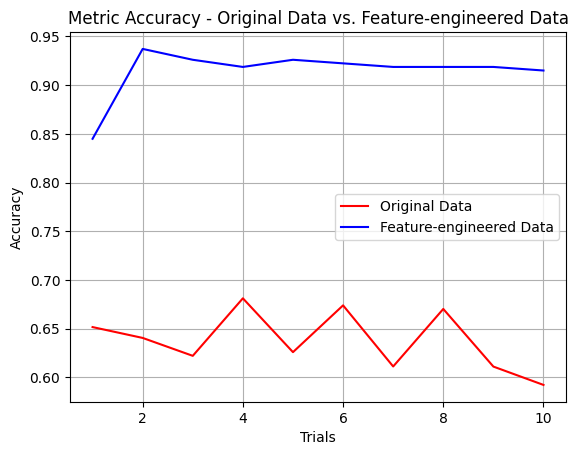

In [40]:
metric_accuracy = df["metric:accuracy [0.0, 1.0] (maximize)"].tolist()
trials = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
original_data = metric_accuracy[:len(metric_accuracy)//2]
engineered_data = metric_accuracy[len(metric_accuracy)//2:]
plt.plot(trials, original_data, color='r', label='Original Data') 
plt.plot(trials, engineered_data, color='b', label='Feature-engineered Data') 
plt.xlabel("Trials") 
plt.ylabel("Accuracy") 
plt.title("Metric Accuracy - Original Data vs. Feature-engineered Data")
plt.legend()
plt.grid(True)
plt.savefig('plots/metric_accuracy.png')
plt.show()

### Train, Val and Test Accuracy over all Splits

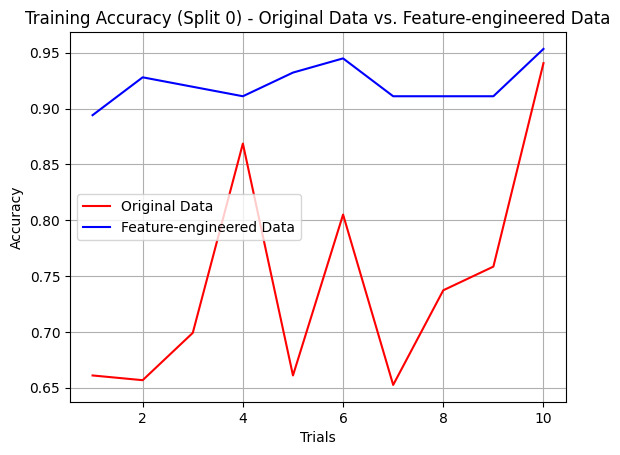

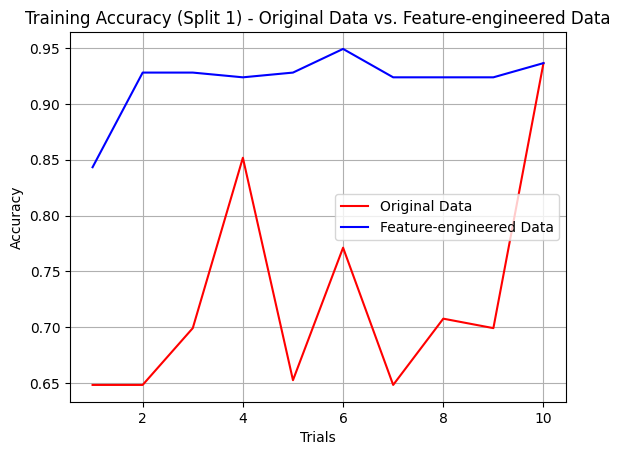

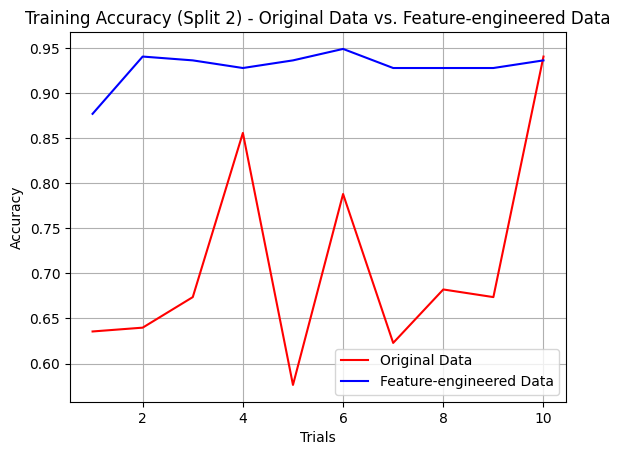

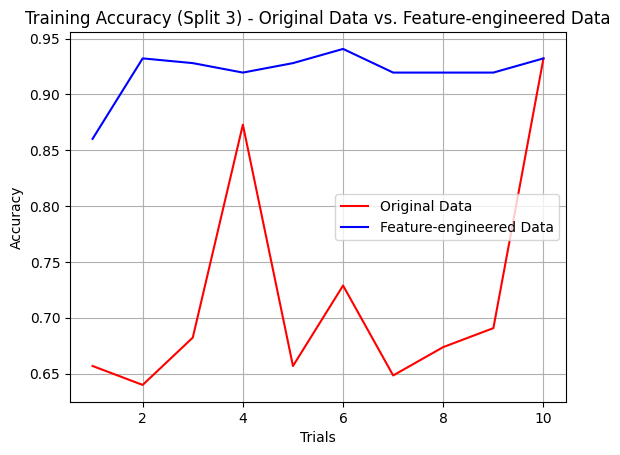

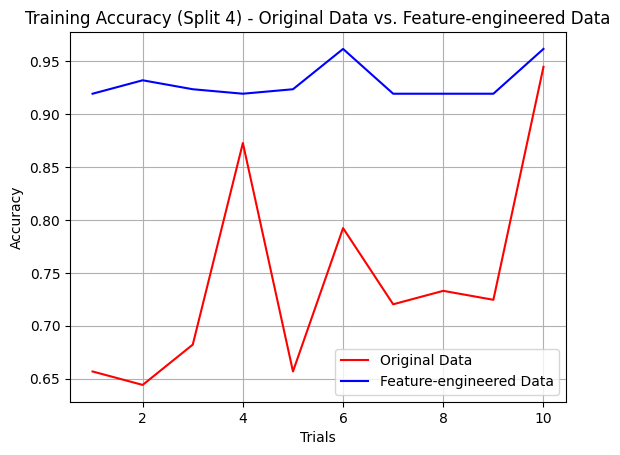

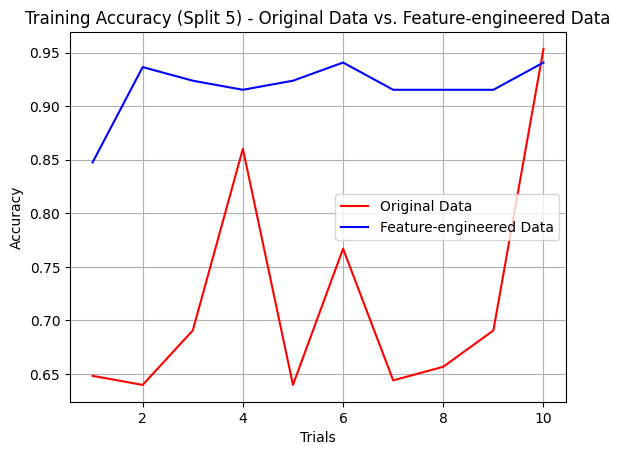

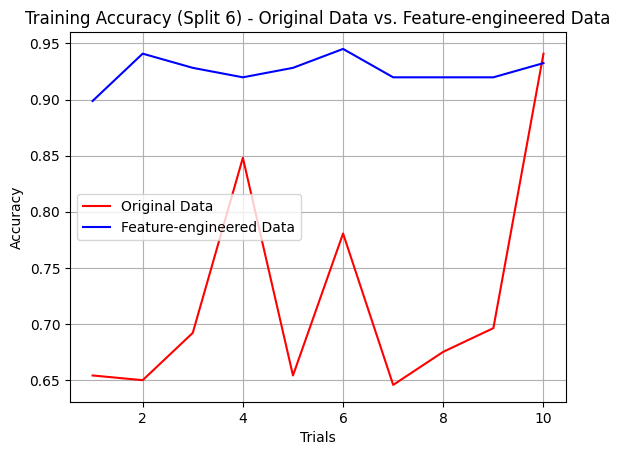

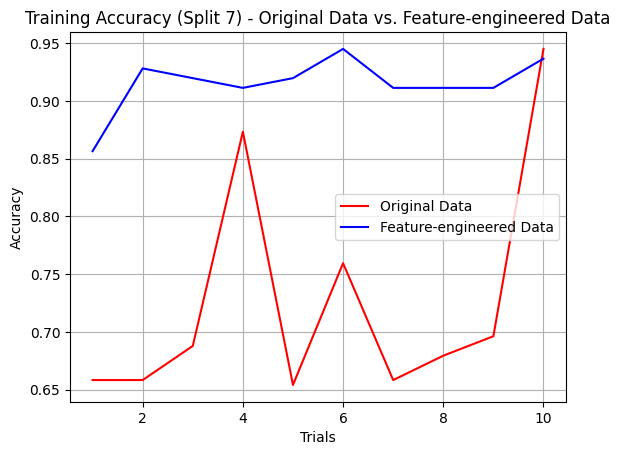

In [41]:
dataset_names = []
for i in range(8):
    dataset_name = "summary:split_" + str(i) + ":train_accuracy"
    dataset_names.append(dataset_name)

trials = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 0
for dataset_name in dataset_names:
    train_accuracy = df[dataset_name].tolist()
    original_data = train_accuracy[:len(train_accuracy)//2]
    engineered_data = train_accuracy[len(train_accuracy)//2:]
    plt.plot(trials, original_data, color='r', label='Original Data') 
    plt.plot(trials, engineered_data, color='b', label='Feature-engineered Data') 
    plt.xlabel("Trials") 
    plt.ylabel("Accuracy") 
    plt.title("Training Accuracy (Split " + str(i) + ") - Original Data vs. Feature-engineered Data")
    plt.legend()
    plt.grid(True)
    plt.show()
    i += 1

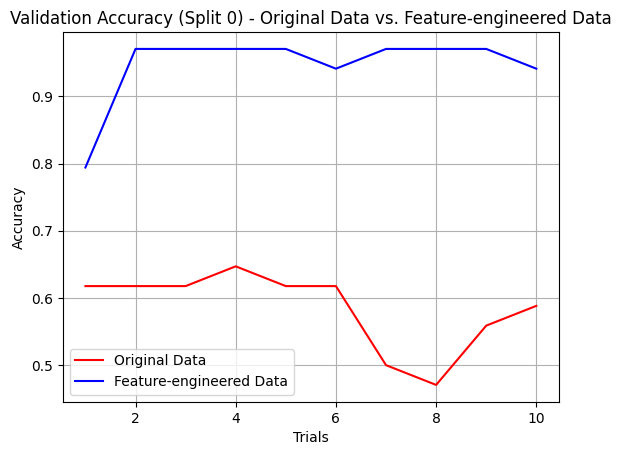

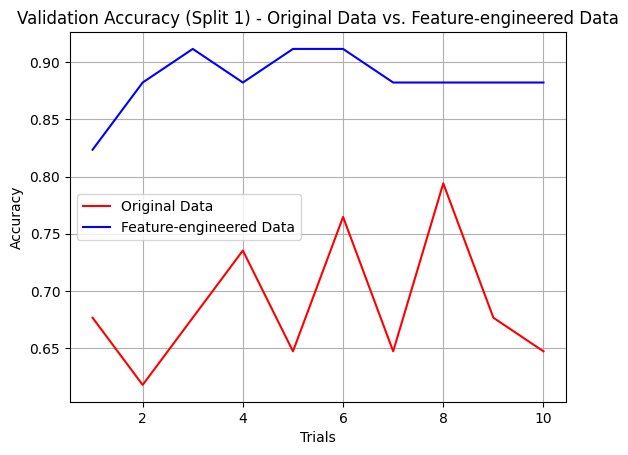

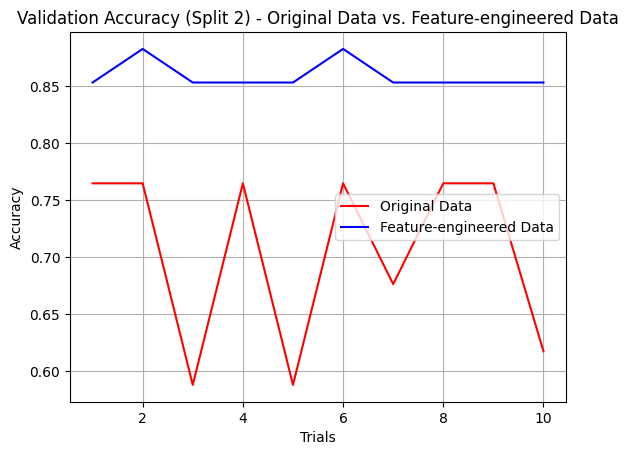

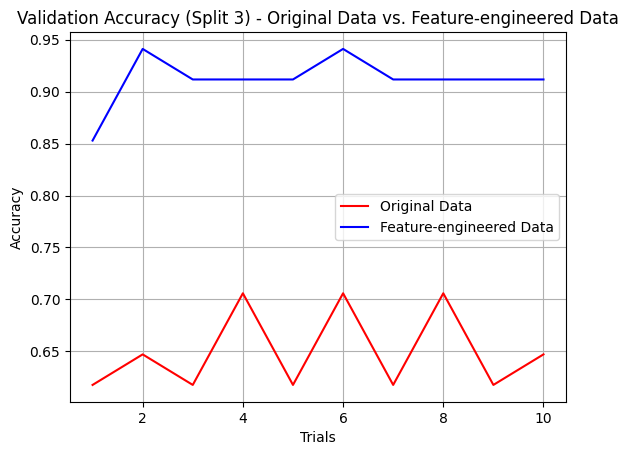

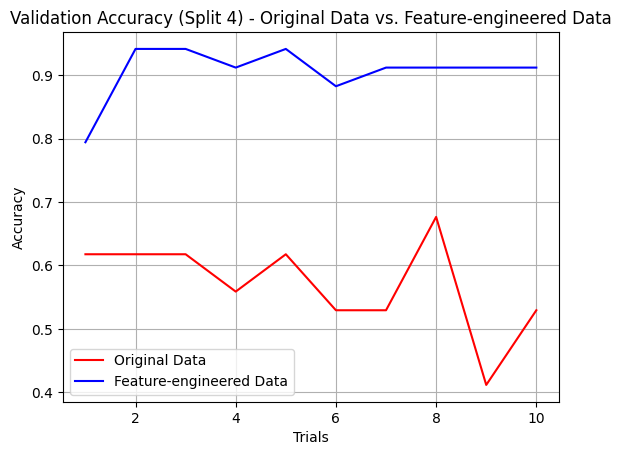

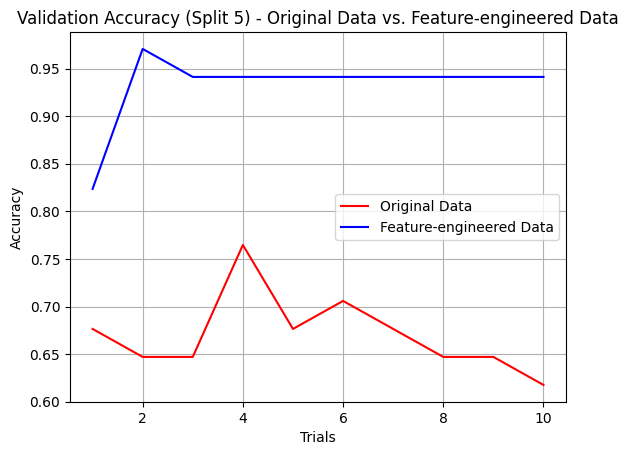

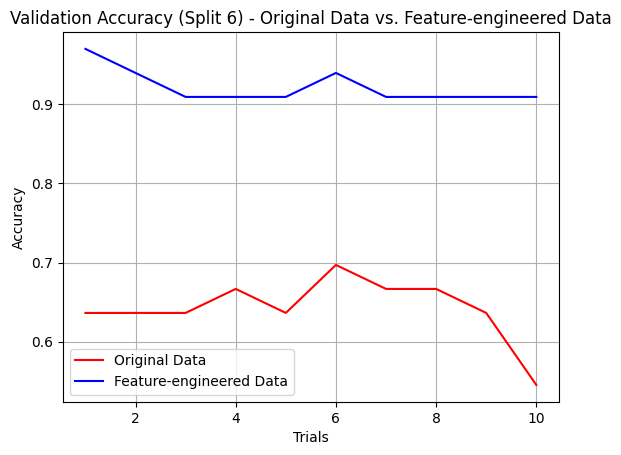

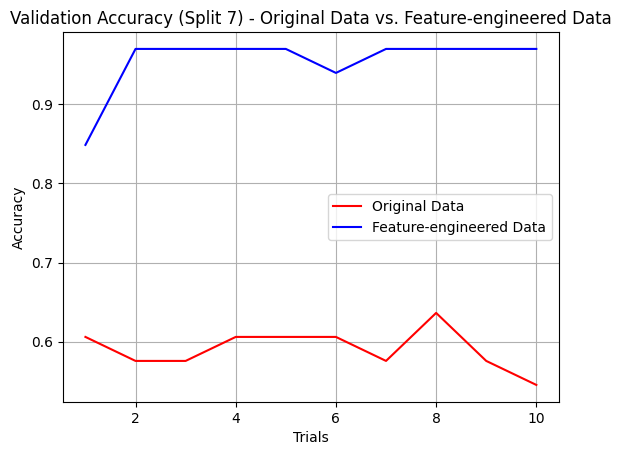

In [42]:
dataset_names = []
for i in range(8):
    dataset_name = "summary:split_" + str(i) + ":val_accuracy"
    dataset_names.append(dataset_name)

trials = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 0
for dataset_name in dataset_names:
    val_accuracy = df[dataset_name].tolist()
    original_data = val_accuracy[:len(val_accuracy)//2]
    engineered_data = val_accuracy[len(val_accuracy)//2:]
    plt.plot(trials, original_data, color='r', label='Original Data') 
    plt.plot(trials, engineered_data, color='b', label='Feature-engineered Data') 
    plt.xlabel("Trials") 
    plt.ylabel("Accuracy") 
    plt.title("Validation Accuracy (Split " + str(i) + ") - Original Data vs. Feature-engineered Data")
    plt.legend()
    plt.grid(True)
    plt.show()
    i += 1

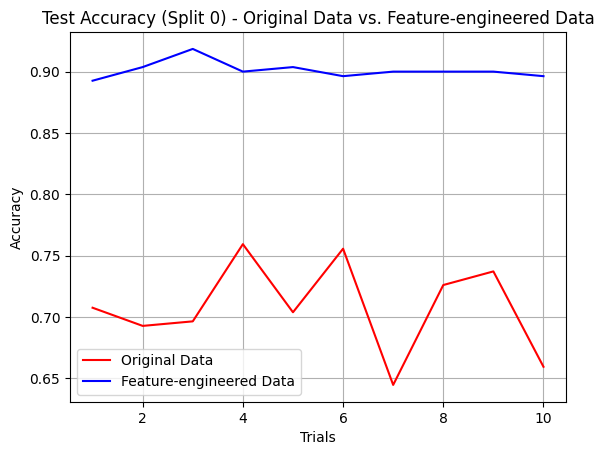

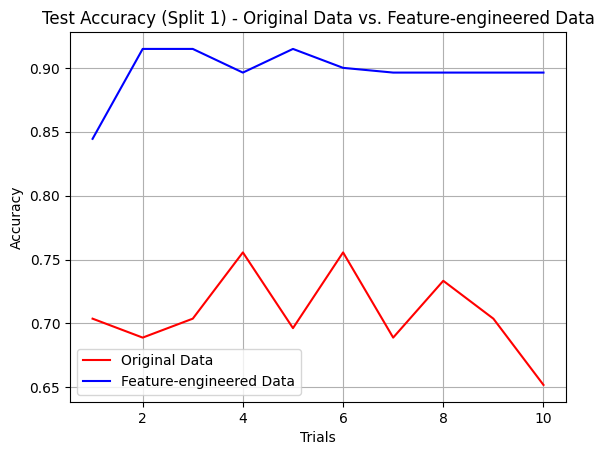

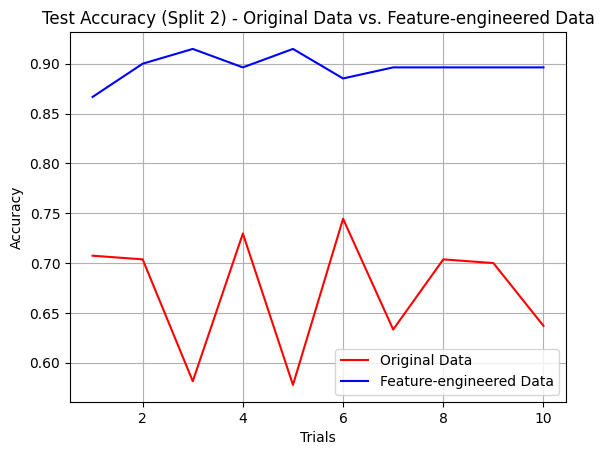

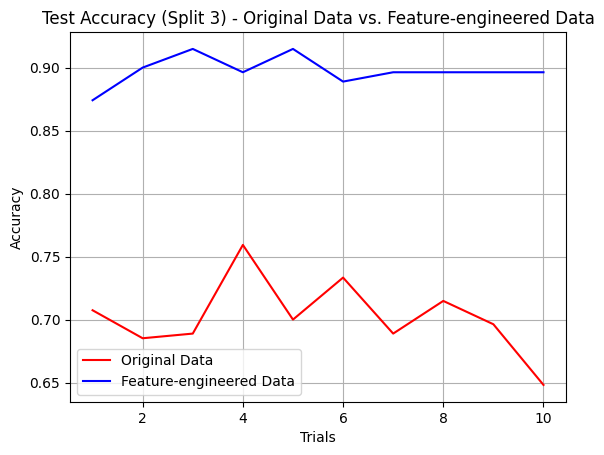

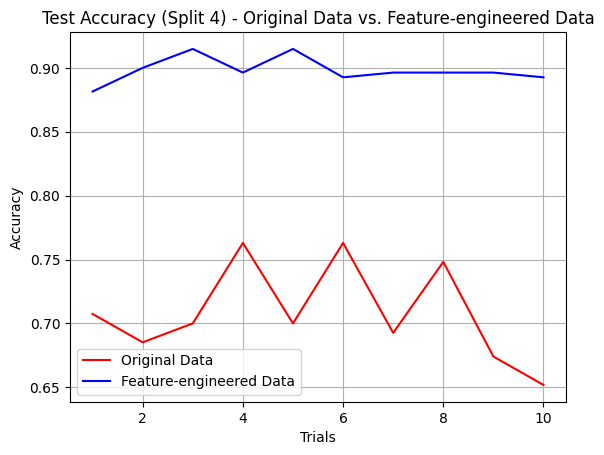

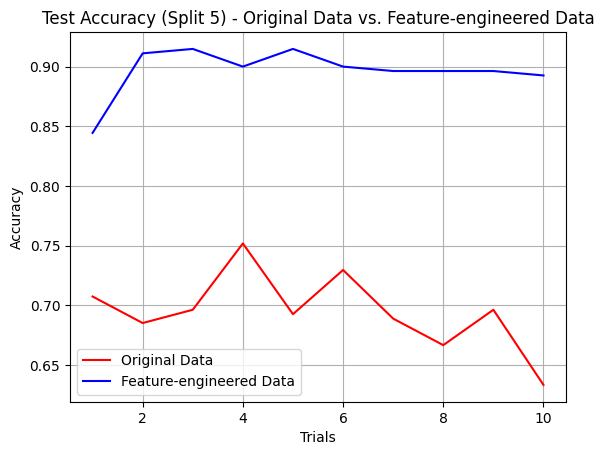

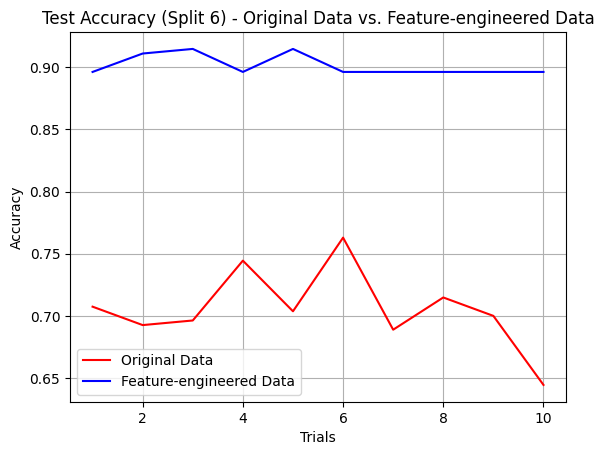

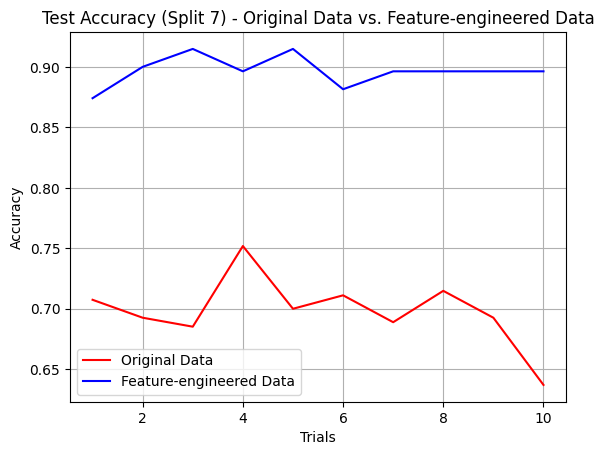

In [43]:
dataset_names = []
for i in range(8):
    dataset_name = "summary:split_" + str(i) + ":test_accuracy"
    dataset_names.append(dataset_name)

trials = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 0
for dataset_name in dataset_names:
    test_accuracy = df[dataset_name].tolist()
    original_data = test_accuracy[:len(test_accuracy)//2]
    engineered_data = test_accuracy[len(test_accuracy)//2:]
    plt.plot(trials, original_data, color='r', label='Original Data') 
    plt.plot(trials, engineered_data, color='b', label='Feature-engineered Data') 
    plt.xlabel("Trials") 
    plt.ylabel("Accuracy") 
    plt.title("Test Accuracy (Split " + str(i) + ") - Original Data vs. Feature-engineered Data")
    plt.legend()
    plt.grid(True)
    plt.show()
    i += 1

### Mean and Std Accuracy (Train, Val and Test)

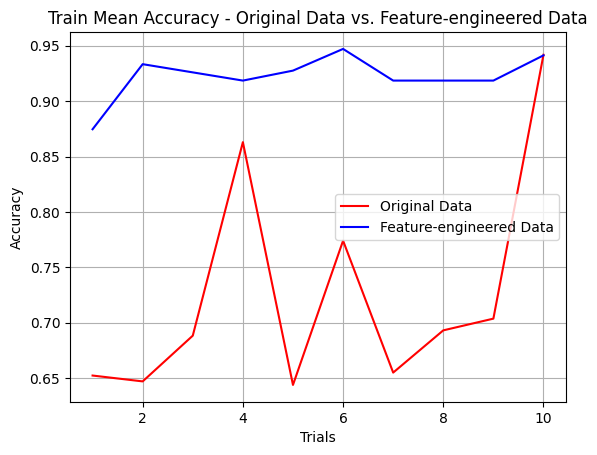

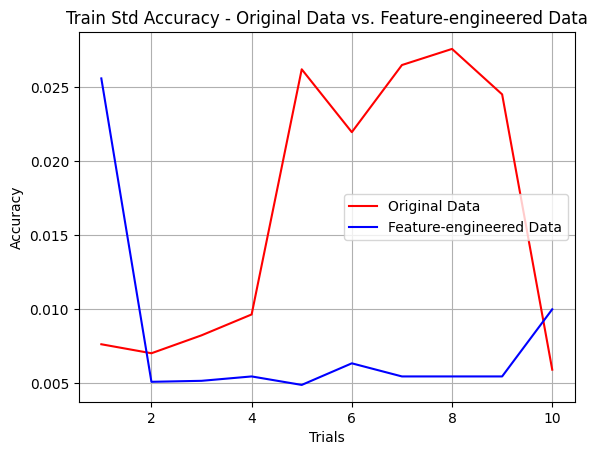

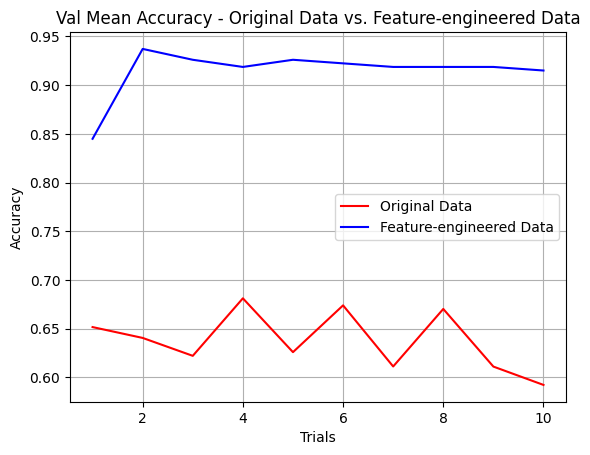

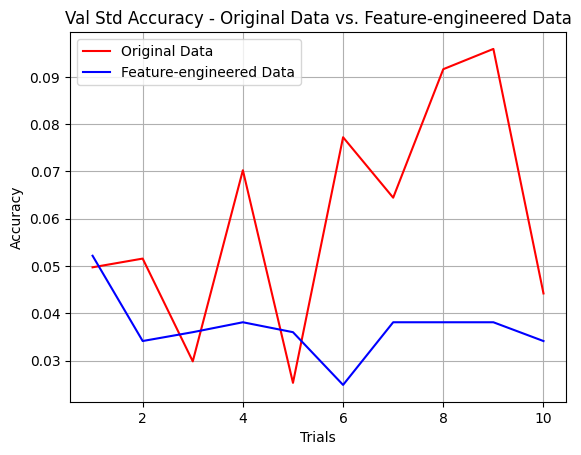

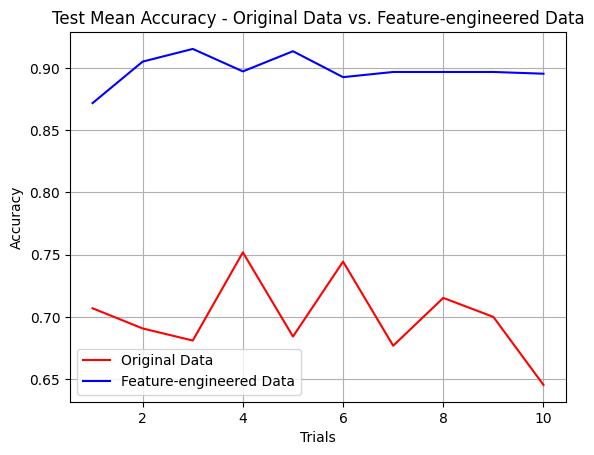

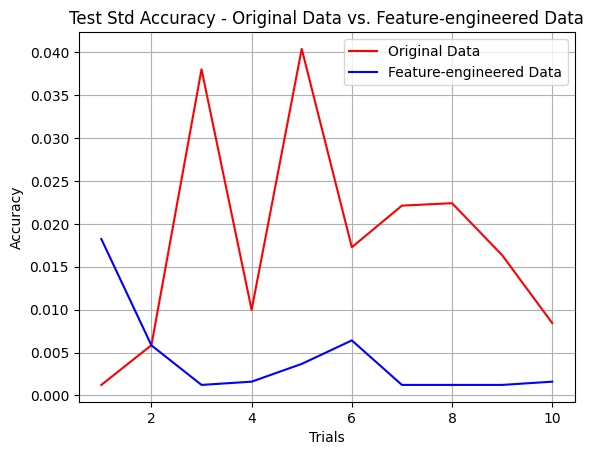

In [44]:
dataset_names = ["summary:train_mean_accuracy", "summary:train_std_accuracy", "summary:val_mean_accuracy", "summary:val_std_accuracy", "summary:test_mean_accuracy", "summary:test_std_accuracy"]
trials = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

train_mean_accuracy = df[dataset_names[0]].tolist()
original_data = train_mean_accuracy[:len(train_mean_accuracy)//2]
engineered_data = train_mean_accuracy[len(train_mean_accuracy)//2:]
plt.plot(trials, original_data, color='r', label='Original Data') 
plt.plot(trials, engineered_data, color='b', label='Feature-engineered Data') 
plt.xlabel("Trials") 
plt.ylabel("Accuracy") 
plt.title("Train Mean Accuracy - Original Data vs. Feature-engineered Data")
plt.legend()
plt.grid(True)
plt.savefig('plots/train_mean_accuracy.png')
plt.show()

train_std_accuracy = df[dataset_names[1]].tolist()
original_data = train_std_accuracy[:len(train_std_accuracy)//2]
engineered_data = train_std_accuracy[len(train_std_accuracy)//2:]
plt.plot(trials, original_data, color='r', label='Original Data') 
plt.plot(trials, engineered_data, color='b', label='Feature-engineered Data') 
plt.xlabel("Trials") 
plt.ylabel("Accuracy") 
plt.title("Train Std Accuracy - Original Data vs. Feature-engineered Data")
plt.legend()
plt.grid(True)
plt.savefig('plots/train_std_accuracy.png')
plt.show()

val_mean_accuracy = df[dataset_names[2]].tolist()
original_data = val_mean_accuracy[:len(val_mean_accuracy)//2]
engineered_data = val_mean_accuracy[len(val_mean_accuracy)//2:]
plt.plot(trials, original_data, color='r', label='Original Data') 
plt.plot(trials, engineered_data, color='b', label='Feature-engineered Data') 
plt.xlabel("Trials") 
plt.ylabel("Accuracy") 
plt.title("Val Mean Accuracy - Original Data vs. Feature-engineered Data")
plt.legend()
plt.grid(True)
plt.savefig('plots/val_mean_accuracy.png')
plt.show()

val_std_accuracy = df[dataset_names[3]].tolist()
original_data = val_std_accuracy[:len(val_std_accuracy)//2]
engineered_data = val_std_accuracy[len(val_std_accuracy)//2:]
plt.plot(trials, original_data, color='r', label='Original Data') 
plt.plot(trials, engineered_data, color='b', label='Feature-engineered Data') 
plt.xlabel("Trials") 
plt.ylabel("Accuracy") 
plt.title("Val Std Accuracy - Original Data vs. Feature-engineered Data")
plt.legend()
plt.grid(True)
plt.savefig('plots/val_std_accuracy.png')
plt.show()

test_mean_accuracy = df[dataset_names[4]].tolist()
original_data = test_mean_accuracy[:len(test_mean_accuracy)//2]
engineered_data = test_mean_accuracy[len(test_mean_accuracy)//2:]
plt.plot(trials, original_data, color='r', label='Original Data') 
plt.plot(trials, engineered_data, color='b', label='Feature-engineered Data') 
plt.xlabel("Trials") 
plt.ylabel("Accuracy") 
plt.title("Test Mean Accuracy - Original Data vs. Feature-engineered Data")
plt.legend()
plt.grid(True)
plt.savefig('plots/test_mean_accuracy.png')
plt.show()

test_std_accuracy = df[dataset_names[5]].tolist()
original_data = test_std_accuracy[:len(test_std_accuracy)//2]
engineered_data = test_std_accuracy[len(test_std_accuracy)//2:]
plt.plot(trials, original_data, color='r', label='Original Data') 
plt.plot(trials, engineered_data, color='b', label='Feature-engineered Data') 
plt.xlabel("Trials") 
plt.ylabel("Accuracy") 
plt.title("Test Std Accuracy - Original Data vs. Feature-engineered Data")
plt.legend()
plt.grid(True)
plt.savefig('plots/test_std_accuracy.png')
plt.show()